# Chess Puzzles Data Analysis

### Key terms

1. **Chess puzzle:** This is essentially a key moment in a chess game. Chess puzzles are won by finding the best sequence of moves in a given chess position, testing the same calculation, spatial awareness, and pattern-recognition skills used in real games. One may analyze chess puzzles as an alternative to analyzing complete games, considering how similar they are to actual games.

2. **Theme:** This term refers to the tactics used, e.g. sacrifice, fork, etc., the stage of the game where the position occurs, e.g. opening, endgame, etc., and the motive behind the moves, e.g. gain an advantage, equalize, etc., among other things.


### Finding the data

I started my search from the [Dataset Finder](https://dataset-finder.netlify.app/) which showed me to Lichess's open database on [database.lichess.org](https://database.lichess.org). I have downloaded the .csv present on https://database.lichess.org/#puzzles into the root of this .ipynb file.

Required installations

In [5]:
# importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install dotenv

In [7]:
from openai import OpenAI
import os
from dotenv import load_dotenv

Exploring the data

In [8]:
# reading the .csv file

df = pd.read_csv('lichess_db_puzzle.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85578 entries, 0 to 85577
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PuzzleId         85578 non-null  object 
 1   FEN              85578 non-null  object 
 2   Moves            85578 non-null  object 
 3   Rating           85578 non-null  int64  
 4   RatingDeviation  85578 non-null  int64  
 5   Popularity       85577 non-null  float64
 6   NbPlays          85577 non-null  float64
 7   Themes           85577 non-null  object 
 8   GameUrl          85577 non-null  object 
 9   OpeningTags      17663 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.5+ MB


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1978,77,95.0,8125.0,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1523,73,96.0,32780.0,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1371,76,91.0,718.0,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1121,74,87.0,593.0,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2854,107,85.0,257.0,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


<Axes: ylabel='Density'>

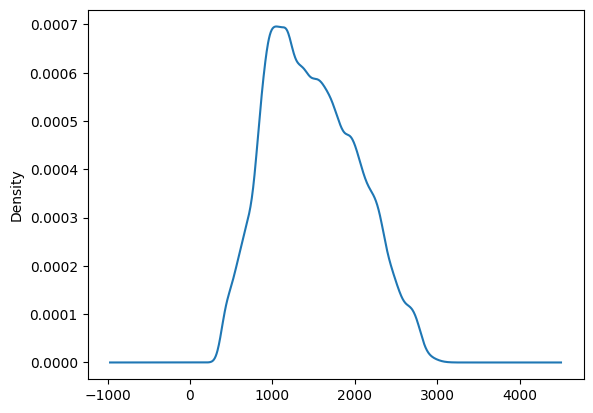

In [9]:
df['Rating'].plot.kde()

### Research question

Can one identify which tactics/typical endgame/strategies or 'themes' are most common at their level of expertise, >=2000 or <2000?

The themes most frequently occurring in one rating group underlie the best set of moves in games of that rating group most often, therefore, if a player was trying to increase their win percentage, they would benefit from training especially on the themes most frequent in puzzles on their level.

### Hypotheses

**Null hypothesis:** The frequency distribution of themes in puzzles rated >=2000 is the same as that than in lower-rated ones.

**Alternative hypothesis:** There are certain themes more commonly present in puzzles rated >=2000 than in lower-rated ones.

### Methodology

I should plot a bar plot of theme frequency distribution grouped by the rating group of puzzles for a visual interpretation of which hypothesis is most likely to be true post-statistical analysis.

To create individual bars for each theme, I will need a list of the unique themes appearing in `df['Themes']`. Since `df['Themes']` may contain multiple themes for the puzzle, I will need to split the values in `df['Themes']` to find the unique words.

Finding unique themes

In [10]:
unique_words = set()
for theme in df['Themes']:
    for word in str(theme).split(" "):
        unique_words.add(word)

unique_words

{'advancedPawn',
 'advantage',
 'anastasiaMate',
 'arabianMate',
 'attackingF2F7',
 'attraction',
 'backRankMate',
 'bishopEndgame',
 'bodenMate',
 'capturingDefender',
 'castling',
 'clearance',
 'crushing',
 'defensiveMove',
 'deflection',
 'discoveredAttack',
 'doubleBishopMate',
 'doubleCheck',
 'dovetailMate',
 'enPassant',
 'endgame',
 'equality',
 'exposedKing',
 'fork',
 'hangingPiece',
 'hookMate',
 'interference',
 'intermezzo',
 'killBoxMate',
 'kingsideAttack',
 'knightEndgame',
 'long',
 'master',
 'masterVsMaster',
 'mate',
 'mateIn1',
 'mateIn2',
 'mateIn3',
 'mateIn4',
 'mateIn5',
 'middlegame',
 'nan',
 'oneMove',
 'opening',
 'pawnEndgame',
 'pin',
 'promotion',
 'queenEndgame',
 'queenRookEndgame',
 'queensideAttack',
 'quietMove',
 'rookEndgame',
 'sacrifice',
 'short',
 'skewer',
 'smotheredMate',
 'superGM',
 'trappedPiece',
 'underPromotion',
 'veryLong',
 'vukovicMate',
 'xRayAttack',
 'zugzwang'}

Finding frequency distribution of themes in higher-rated puzzles

In [11]:
high_rated_puzzles = df[df['Rating'] >= 2000]

# initialize pd.DataFrame

counts_themes_high_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = high_rated_puzzles[high_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_high_rated.loc[word, 'Frequency'] = len(filtered_df) / len(high_rated_puzzles)

counts_themes_high_rated.head()

,Frequency
queenEndgame,0.011259
doubleBishopMate,0.0
queensideAttack,0.011494
mateIn1,0.000704
underPromotion,0.000586


Finding frequency distribution of themes in lower-rated puzzles

In [12]:
low_rated_puzzles = df[df['Rating'] < 2000]

# initialize pd.DataFrame

counts_themes_low_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = low_rated_puzzles[low_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_low_rated.loc[word, 'Frequency'] = len(filtered_df) / len(low_rated_puzzles)

counts_themes_low_rated.head()

,Frequency
queenEndgame,0.01112
doubleBishopMate,0.000555
queensideAttack,0.015513
mateIn1,0.16718
underPromotion,0.000058


Comparing counts using a grouped bar graph

In [13]:
counts_themes_high_rated['RatingGroup'] = 'High'
counts_themes_low_rated['RatingGroup'] = 'Low'

counts_themes_low_rated['Theme'] = counts_themes_low_rated.index
counts_themes_high_rated['Theme'] = counts_themes_high_rated.index

counts_themes_low_rated = counts_themes_low_rated.reset_index(drop=True)
counts_themes_high_rated = counts_themes_high_rated.reset_index(drop=True)

combined_counts_themes = pd.concat([counts_themes_high_rated, counts_themes_low_rated], ignore_index=True)
combined_counts_themes = combined_counts_themes.dropna(axis=0)

combined_counts_themes.head()

,Frequency,RatingGroup,Theme
0,0.011259,High,queenEndgame
1,0.0,High,doubleBishopMate
2,0.011494,High,queensideAttack
3,0.000704,High,mateIn1
4,0.000586,High,underPromotion


Creating frequency distributions of rating groups for each theme

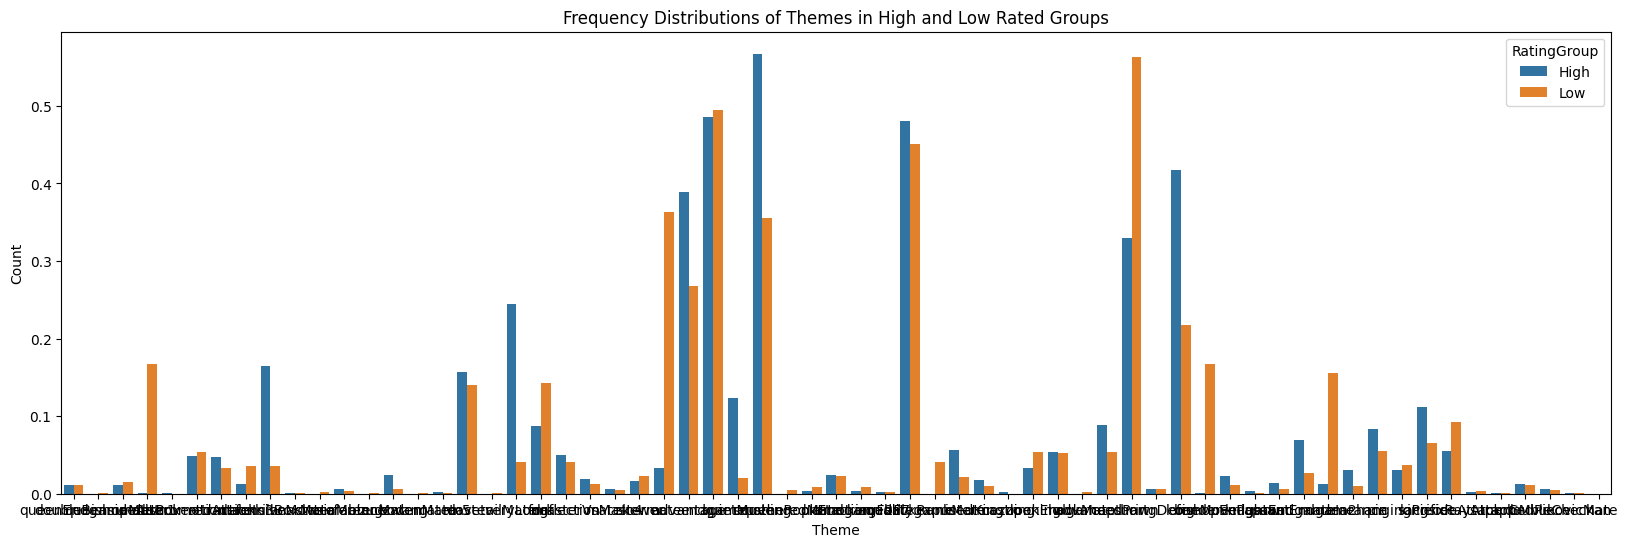

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes, ax=ax)
ax.set_xlabel('Theme')
ax.set_ylabel('Count')
ax.set_title('Frequency Distributions of Themes in High and Low Rated Groups')
plt.show()

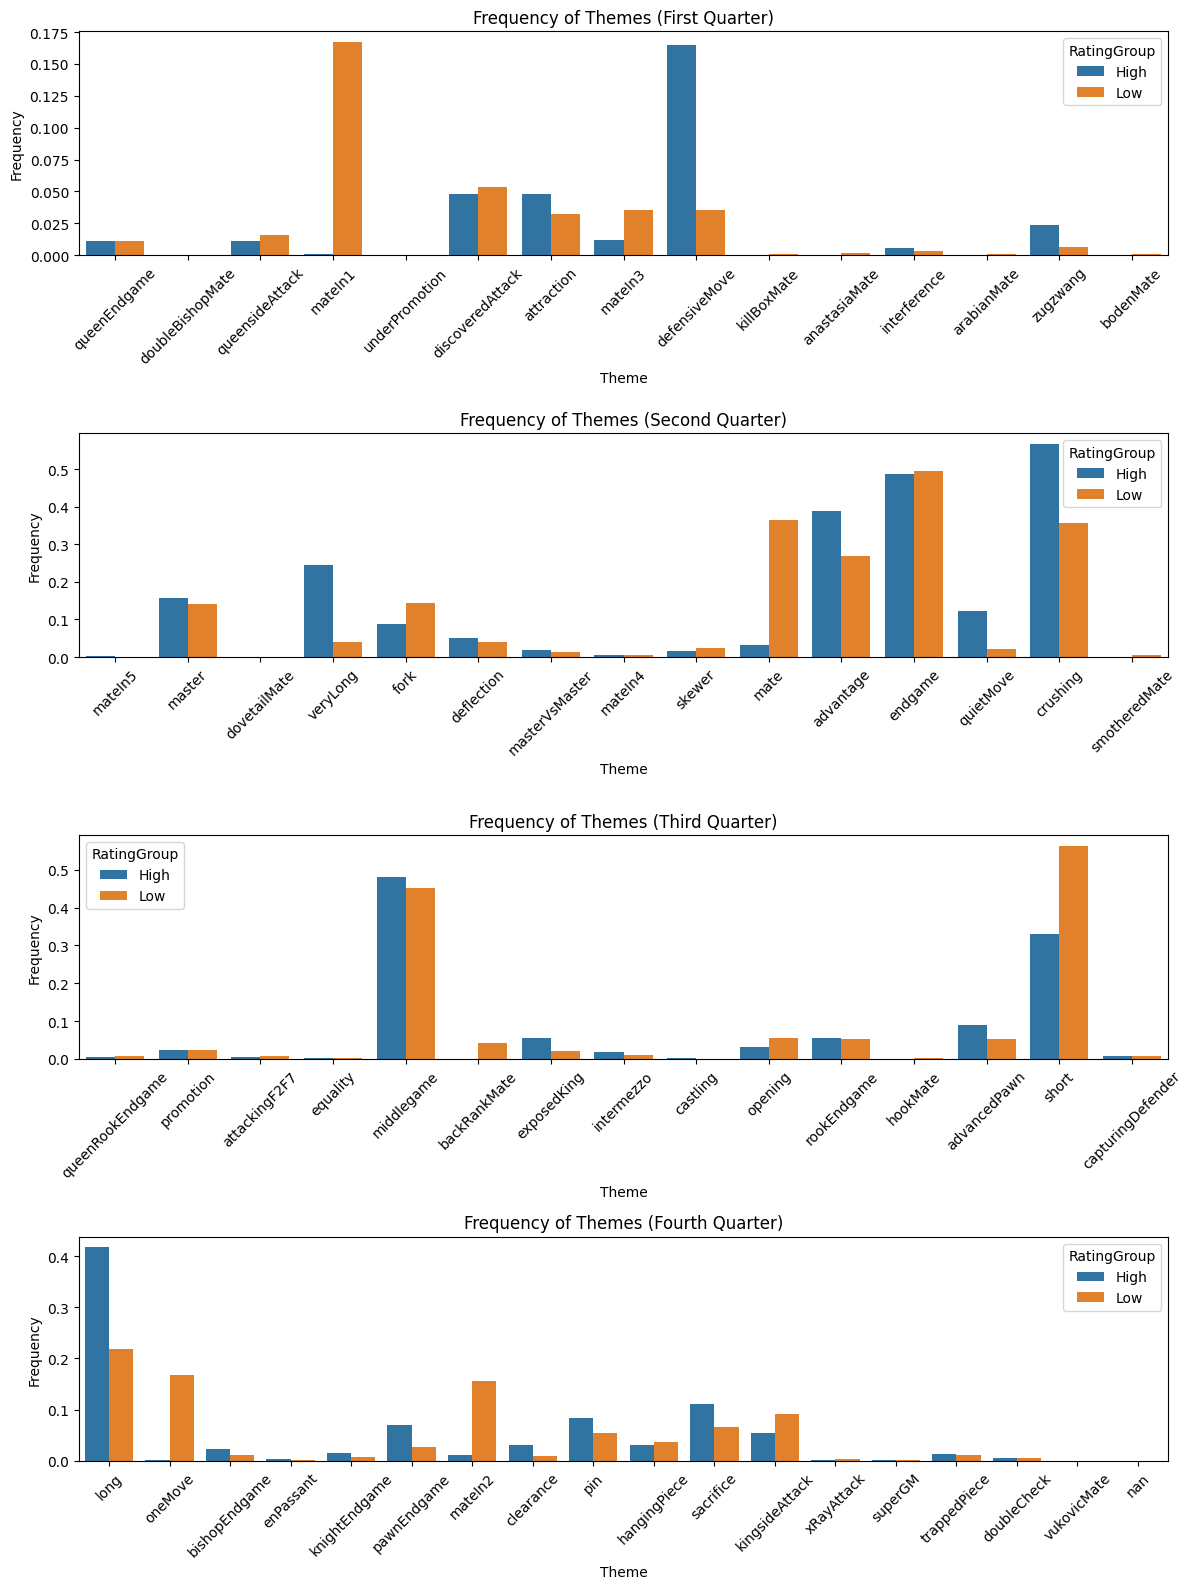

In [15]:
# splitting the combined counts of themes between into dataframes
# since a single grouped bar graph for the combined counts of themes is overcrowded on the x-axis

themes = combined_counts_themes['Theme'].unique()
quarter_length = len(themes) // 4
themes_quarter1 = themes[:quarter_length]
themes_quarter2 = themes[quarter_length:quarter_length*2]
themes_quarter3 = themes[quarter_length*2:quarter_length*3]
themes_quarter4 = themes[quarter_length*3:]

combined_counts_themes_quarter1 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter1)]
combined_counts_themes_quarter2 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter2)]
combined_counts_themes_quarter3 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter3)]
combined_counts_themes_quarter4 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter4)]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter1, ax=axes[0])
axes[0].set_title('Frequency of Themes (First Quarter)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter2, ax=axes[1])
axes[1].set_title('Frequency of Themes (Second Quarter)')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter3, ax=axes[2])
axes[2].set_title('Frequency of Themes (Third Quarter)')
axes[2].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter4, ax=axes[3])
axes[3].set_title('Frequency of Themes (Fourth Quarter)')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Automating identification of themes significantly more likely to be present in high-rated puzzles than in low-rated puzzles

---



In [18]:
# If frequency of a theme in high-rated puzzles is at least 1.5 times that in low-rated puzzles,
# it is said to 'appear' more likely to be present in high-rated puzzles than in low-rated puzzles.
# This is not a substitute for a statistical analysis

significantly_more_likely_in_high_rated = []

for word in unique_words:
  high_freq = counts_themes_high_rated[counts_themes_high_rated['Theme'] == word]['Frequency'].iloc[0]
  low_freq = counts_themes_low_rated[counts_themes_low_rated['Theme'] == word]['Frequency'].iloc[0]

  if high_freq >= 1.5 * low_freq:
    significantly_more_likely_in_high_rated.append(word)

print(significantly_more_likely_in_high_rated)
print(f'{len(significantly_more_likely_in_high_rated)}\n')

significantly_more_likely_in_low_rated = []

for word in unique_words:
  high_freq = counts_themes_high_rated[counts_themes_high_rated['Theme'] == word]['Frequency'].iloc[0]
  low_freq = counts_themes_low_rated[counts_themes_low_rated['Theme'] == word]['Frequency'].iloc[0]

  if high_freq < 1.5 * low_freq:
    significantly_more_likely_in_low_rated.append(word)

print(significantly_more_likely_in_low_rated)
print(len(significantly_more_likely_in_low_rated))

['underPromotion', 'defensiveMove', 'interference', 'zugzwang', 'mateIn5', 'veryLong', 'quietMove', 'crushing', 'exposedKing', 'intermezzo', 'castling', 'advancedPawn', 'long', 'bishopEndgame', 'enPassant', 'knightEndgame', 'pawnEndgame', 'clearance', 'pin', 'sacrifice', 'superGM', 'nan']
22

['queenEndgame', 'doubleBishopMate', 'queensideAttack', 'mateIn1', 'discoveredAttack', 'attraction', 'mateIn3', 'killBoxMate', 'anastasiaMate', 'arabianMate', 'bodenMate', 'master', 'dovetailMate', 'fork', 'deflection', 'masterVsMaster', 'mateIn4', 'skewer', 'mate', 'advantage', 'endgame', 'smotheredMate', 'queenRookEndgame', 'promotion', 'attackingF2F7', 'equality', 'middlegame', 'backRankMate', 'opening', 'rookEndgame', 'hookMate', 'short', 'capturingDefender', 'oneMove', 'mateIn2', 'hangingPiece', 'kingsideAttack', 'xRayAttack', 'trappedPiece', 'doubleCheck', 'vukovicMate']
41


In [29]:
theme = 'crushing'
print(f'''Frequency in higher-rated puzzles: {counts_themes_high_rated[counts_themes_high_rated['Theme'] == theme]['Frequency'].iloc[0]}
Frequency in lower-rated puzzles: {counts_themes_low_rated[counts_themes_high_rated['Theme'] == theme]['Frequency'].iloc[0]}''')

Frequency in higher-rated puzzles: 0.5672902128657714
Frequency in lower-rated puzzles: 0.3556366289675301


### Results

It appears that around 21 of the 62 themes are 1.5 times more likely to be present in puzzles rated >=2000 than in lower-rated puzzles, with 'sacrifice' occuring in 11.12% of higher-rated puzzles but only 6.59% of lower-rated ones, and 'long' in 41.68% of higher-rated but only 21.80% in lower-rated puzzles.

On the other hand, 'mateIn1' occurred in 16.72% of lower-rated puzzles but only 0.07% of higher-rated ones, and 'backRankMate' in 4.14% of lower-rated but only 0.02% of higher-rated puzzles.

The most frequent themes in either rating group suggest that the count of moves in the puzzle are a good indicator of the rating of the puzzle.

### Conclusion

Players may streamline their approach to increasing win percentage by focusing on improving in themes most common in their rating group. Players trying to cross 2000 may focus on themes frequent in both rating groups, e.g. 'middleGame,' 'endGame,' and 'crushing.'

To improve this project, I should perform statistical analysis for a reliable determination of which themes, if any, appear *significantly* more likely in one puzzle group. I should also check if the rating is better determined by other factors such as move count. Additionally, I could find the more prevalent themes for smaller rating bins for making results more specific to players.